# 2 Second Dataset

In [ ]:
import gdown
url = 'https://drive.google.com/uc?export=download&id=1CHaOuqYbJ7RZXCqCeuurUX88Wh6-Sfuc'
output = 'downloaded_file.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1CHaOuqYbJ7RZXCqCeuurUX88Wh6-Sfuc
From (redirected): https://drive.google.com/uc?export=download&id=1CHaOuqYbJ7RZXCqCeuurUX88Wh6-Sfuc&confirm=t&uuid=e3dc0be5-9d15-4f60-bf5a-0d894855f225
To: /content/downloaded_file.zip
100%|██████████| 441M/441M [00:18<00:00, 24.0MB/s]


'downloaded_file.zip'

In [ ]:
!unzip "downloaded_file.zip"
!rm "downloaded_file.zip"

Archive:  downloaded_file.zip
  inflating: fendy/fd_1.wav          
  inflating: fendy/fd_10.wav         
  inflating: fendy/fd_100.wav        
  inflating: fendy/fd_101.wav        
  inflating: fendy/fd_102.wav        
  inflating: fendy/fd_103.wav        
  inflating: fendy/fd_104.wav        
  inflating: fendy/fd_105.wav        
  inflating: fendy/fd_106.wav        
  inflating: fendy/fd_107.wav        
  inflating: fendy/fd_108.wav        
  inflating: fendy/fd_109.wav        
  inflating: fendy/fd_11.wav         
  inflating: fendy/fd_110.wav        
  inflating: fendy/fd_111.wav        
  inflating: fendy/fd_112.wav        
  inflating: fendy/fd_113.wav        
  inflating: fendy/fd_114.wav        
  inflating: fendy/fd_115.wav        
  inflating: fendy/fd_116.wav        
  inflating: fendy/fd_117.wav        
  inflating: fendy/fd_118.wav        
  inflating: fendy/fd_119.wav        
  inflating: fendy/fd_12.wav         
  inflating: fendy/fd_120.wav        
  inflating: fendy/f

In [ ]:
#import library yang dipakai
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import tensorflow as tf
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preprocessing

In [ ]:
speaker_folders = [
    "speaker23",
    "speaker25",
    "speaker48",
    "fendy",
    "wilbert",
    "leonardo",
    "goldwin"
]
#fungsi extract_features berguna untuk mengekstrak Mel-Frequency Cepstral Coefficients yang sudah distandarisasi, dan juga label output kategorik (nama speakernya)
def extract_features(speaker_folders):
    features = []
    labels = []
    for i, speaker_folder in enumerate(speaker_folders):
        for filename in os.listdir(speaker_folder):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder, filename)
                audio, sr = librosa.load(file_path, sr=16000, duration=1)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfccs = StandardScaler().fit_transform(mfccs)
                features.append(mfccs.T)
                labels.append(i)
    return np.array(features), np.array(labels)
#fitur mfccs dan label dimasukkan ke variabel X dan y
X, y = extract_features(speaker_folders)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#labelencoder.classes_ digunakan untuk menyimpan nama speaker / label asli dari label yang diencoding
label_encoder.classes_ = np.array(speaker_folders)

#membelah training data menjadi 80% dan testing menjadi 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Classifier

In [ ]:
#mengubah bentuk dari fitur agar bisa diterima oleh model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#SVM classifier dengan kernel radial basis function
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(X_train_flat, y_train)


SVC()

In [ ]:
for x in X_train_flat:
  print(x)

Streaming output truncated to the last 5000 lines.
 -2.20294380e+00  2.64344835e+00 -3.15025598e-01  1.99005410e-01
  6.00820361e-03  3.03786770e-02 -6.02114856e-01 -2.20238660e-02
 -4.79048282e-01  6.47235870e-01 -1.16148731e-02  8.62140357e-02
  2.04808507e-02 -2.79754710e+00  2.17271090e+00  1.32114798e-01
  1.45959616e-01  1.84828877e-01  5.63964210e-02 -2.52804369e-01
 -4.13792357e-02 -3.00190777e-01  4.38350439e-01  1.05769671e-01
  1.31498992e-01  2.42915042e-02 -2.64383602e+00  2.33860397e+00
  1.32227480e-01 -3.68255675e-01  7.61331841e-02  1.11531802e-01
 -2.12226704e-01  1.86694607e-01 -2.52360255e-01  4.27576065e-01
  5.81991486e-02  1.93943486e-01 -4.82309349e-02 -2.19164968e+00
  2.74034524e+00 -1.11929312e-01 -3.83746386e-01 -1.39055908e-01
  1.08296855e-03 -2.35101581e-01  2.49481767e-01 -4.54123825e-01
  3.96972746e-01 -2.13522352e-02  1.61588773e-01 -1.25125023e-02
 -2.27362466e+00  2.71327209e+00 -1.97156355e-01 -3.89696993e-02
 -2.58526832e-01 -7.54569247e-02 -4.546

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -1.59216911e-01  1.41173333e-01 -5.01273908e-02  1.07058838e-01
 -2.80614400e+00  1.81982565e+00 -2.31078371e-01  1.19463587e+00
  2.29105756e-01  6.84806556e-02 -3.91821593e-01 -1.44398883e-01
  2.14065313e-01 -1.82596460e-01  1.18875653e-01  2.21948009e-02
  8.88553783e-02 -2.99048877e+00  1.58696592e+00 -9.11165327e-02
  1.10780191e+00  2.65184700e-01  1.26799479e-01 -3.23807567e-01
 -5.89707270e-02  2.23672688e-01 -1.51196122e-01  1.32547453e-01
  4.82015759e-02  1.24405973e-01 -3.23269844e+00  1.25826406e+00
  1.67261720e-01  8.13918710e-01  3.42599750e-01  2.17272833e-01
 -1.31202072e-01  4.46104519e-02  2.13810697e-01 -4.93723303e-02
  1.24262862e-01  8.50638598e-02  1.46207944e-01 -3.31894350e+00
  1.02258372e+00  1.03767477e-01  7.91492403e-01 -2.66332808e-03
  1.95397034e-01  1.22650824e-01  1.41138742e-02  2.62916476e-01
  2.14124262e-01  1.20619781e-01  2.93743312e-01  1.80197626e-01
 -3.25543213e+00  1.07081294e+00 -8.138

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  3.16049516e-01 -3.56014855e-02 -7.11777136e-02 -2.93456888e+00
  1.29449427e+00  3.41891199e-02  1.53006434e+00  2.39287585e-01
 -4.43379283e-02  1.08603045e-01 -4.72282544e-02  8.13142359e-02
 -4.49655741e-01  2.72821575e-01  2.90302094e-02 -1.14013605e-01]
[-3.31067586e+00  1.23594391e+00  2.21898049e-01 -5.50328977e-02
  2.03891650e-01  2.99524039e-01  1.47142068e-01  1.19446740e-01
  2.01052338e-01  3.29650164e-01  3.03543508e-01  2.02182904e-01
  1.01433180e-01 -3.22347784e+00  1.41157103e+00  1.27096802e-01
 -2.50287980e-01  1.93173692e-01  4.31667596e-01  2.33189613e-01
 -6.12170855e-03  1.69652373e-01  2.85988390e-01  3.09900552e-01
  1.95781708e-01  1.21865846e-01 -2.54465961e+00  2.23365235e+00
  2.72605270e-01 -8.05872619e-01  3.07844691e-02  6.67823374e-01
  1.95348382e-01 -4.81069028e-01  9.42854211e-02  2.53565878e-01
  7.87651166e-02  9.13668349e-02 -8.65958184e-02 -2.01244950e+00
  2.65915990e+00  5.69662005e-02 -8.91

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  2.71223426e-01  2.15317398e-01  2.48916343e-01  2.50675678e-01
 -3.45197511e+00  5.46382785e-01  3.03414911e-01  2.92579681e-01
  2.71381080e-01  3.11940312e-01  1.81774616e-01  2.77091503e-01
  3.12863708e-01  2.66915500e-01  2.19131410e-01  2.35091195e-01
  2.33408496e-01 -3.44922948e+00  5.64725041e-01  2.78081894e-01
  2.98652530e-01  2.88450778e-01  3.23928207e-01  1.76385343e-01
  2.62806535e-01  3.27688009e-01  2.97549516e-01  1.93266422e-01
  2.16468722e-01  2.21226379e-01 -3.44435644e+00  5.78184664e-01
  2.22162560e-01  2.81500131e-01  3.17096621e-01  3.56572241e-01
  1.39273629e-01  2.26398692e-01  3.71354431e-01  3.26407909e-01
  1.96921140e-01  2.22640455e-01  2.05843955e-01 -3.44041777e+00
  5.68672836e-01  1.59910545e-01  2.89524555e-01  3.23413551e-01
  3.73396903e-01  1.08044028e-01  1.45550892e-01  3.71672153e-01
  3.72452945e-01  2.32751891e-01  2.35285461e-01  2.59742111e-01
 -3.44119668e+00  5.40860891e-01  1.323

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  2.37923741e-01  1.47325963e-01 -3.28512359e+00  1.29176748e+00
  1.31725982e-01  4.95477825e-01  1.53447717e-01  3.37949038e-01
  1.00853518e-01  1.91598266e-01  4.16164324e-02  1.40654951e-01
  5.78721017e-02  2.35932291e-01  1.06227972e-01 -3.28796768e+00
  1.26020908e+00  1.03445232e-01  5.43175161e-01  1.67722151e-01
  3.56207848e-01  1.15124181e-01  2.15882316e-01  4.71785180e-02
  1.34515285e-01  3.09292786e-02  2.27804527e-01  8.57739523e-02
 -3.29047465e+00  1.25696611e+00  7.74976909e-02  5.14850199e-01
  1.52279392e-01  3.54370713e-01  1.42777920e-01  2.46674612e-01
  2.92546470e-02  1.28016323e-01  5.56592345e-02  2.56172627e-01
  7.59550482e-02 -3.28143001e+00  1.28106534e+00  6.32369220e-02
  5.04083335e-01  1.49834096e-01  3.84877831e-01  1.33567929e-01
  2.41209000e-01  2.69136345e-03  1.47643909e-01  5.80003820e-02
  2.33549297e-01  8.16707090e-02 -3.28999639e+00  1.26043034e+00
  7.22821206e-02  5.02419353e-01  1.180

In [ ]:
#memprediksi dengan model SVM
y_pred = svm_classifier.predict(X_test_flat)

#evaluasi model SVM
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Test Accuracy: 0.96996996996997
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       246
           1       0.93      1.00      0.96       273
           2       0.99      1.00      0.99       165
           3       0.99      0.92      0.95        78
           4       0.99      1.00      1.00       104
           5       0.97      0.90      0.93        79
           6       1.00      0.96      0.98        54

    accuracy                           0.97       999
   macro avg       0.98      0.96      0.97       999
weighted avg       0.97      0.97      0.97       999



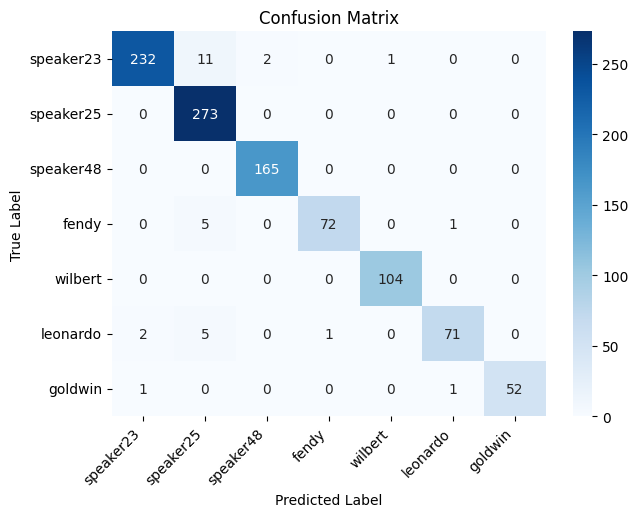

In [ ]:
#confusion matrix model SVM
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# XGBOOST

In [ ]:
#model XGBoost untuk klasifikasi
XGB = XGBClassifier()
XGB.fit(X_train_flat, y_train)

#melakukan prediksi dengan model XGBoost
y_pred = XGB.predict(X_test_flat)

#evaluasi model XGBoost
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.968968968968969
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       246
           1       0.95      0.99      0.97       273
           2       0.98      0.99      0.99       165
           3       0.95      0.90      0.92        78
           4       1.00      0.98      0.99       104
           5       0.99      0.91      0.95        79
           6       1.00      0.93      0.96        54

    accuracy                           0.97       999
   macro avg       0.98      0.95      0.96       999
weighted avg       0.97      0.97      0.97       999



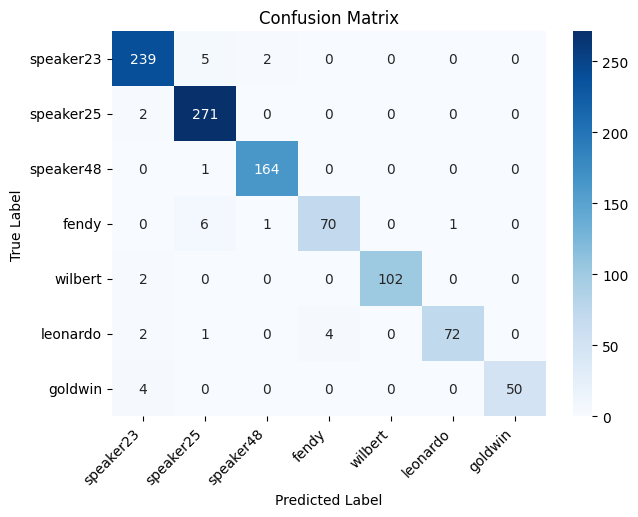

In [ ]:
#confusion matrix untuk XGBoost
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# RNN

In [ ]:
#membelah dataset menjadi 70% untuk training, 15% untuk validation, dan 15% untuk testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (3495, 32, 13)
Validation Data Shape: (749, 32, 13)


In [ ]:
#model RNN yang terdiri dari layer LSTM, dan Dense layer dengan activation function relu dan outputlayer menggunakan activation softmax
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(speaker_folders), activation='softmax')
])

#kompilasi model optimizer adam, loss function sparse_categorical_crossentropy yang cocok untuk multiclass classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#earlystopping untuk memberhentikan model jika sudah tidak dapat belajar lagi
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

#melakukan training model dengan epoch 20 dan batch sebanyak 32
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

if early_stopping.stopped_epoch > 0:
    print("Early stopping triggered at epoch", early_stopping.stopped_epoch + 1)
else:
    print("Training completed without early stopping")


Epoch 1/20
110/110 [==============================] - 12s 79ms/step - loss: 0.9052 - accuracy: 0.6741 - val_loss: 0.3660 - val_accuracy: 0.8772
Epoch 2/20
110/110 [==============================] - 6s 56ms/step - loss: 0.2297 - accuracy: 0.9253 - val_loss: 0.1981 - val_accuracy: 0.9279
Epoch 3/20
110/110 [==============================] - 7s 62ms/step - loss: 0.1296 - accuracy: 0.9594 - val_loss: 0.1924 - val_accuracy: 0.9386
Epoch 4/20
110/110 [==============================] - 6s 53ms/step - loss: 0.1048 - accuracy: 0.9688 - val_loss: 0.0753 - val_accuracy: 0.9746
Epoch 5/20
110/110 [==============================] - 5s 44ms/step - loss: 0.0941 - accuracy: 0.9705 - val_loss: 0.1483 - val_accuracy: 0.9613
Epoch 6/20
110/110 [==============================] - 10s 87ms/step - loss: 0.0990 - accuracy: 0.9697 - val_loss: 0.1768 - val_accuracy: 0.9319
Early stopping triggered at epoch 6


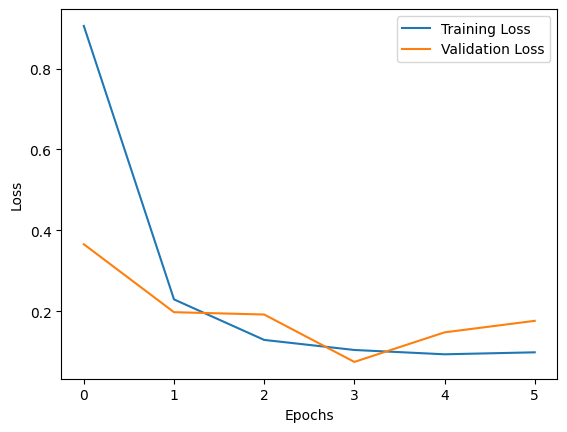

In [ ]:
#plot untuk melihat penurunan loss dari setiap epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

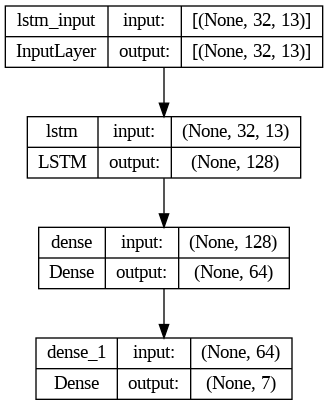

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

#plot arsitektur dari model RNN
plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)
Image('rnn_model.png')

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# melakukan prediksi pada testing set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# mengembalikan output ke wujud asalnya
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# evaluasi model RNN
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Test Evaluation Accuracy: {accuracy}")
f1 = f1_score(y_test_decoded, y_pred_decoded, labels=speaker_folders, average='weighted')
print(f"Weighted F1 Score: {f1}")

24/24 [==============================] - 1s 29ms/step
Test Evaluation Accuracy: 0.9826666666666667
Weighted F1 Score: 0.9827667724698916


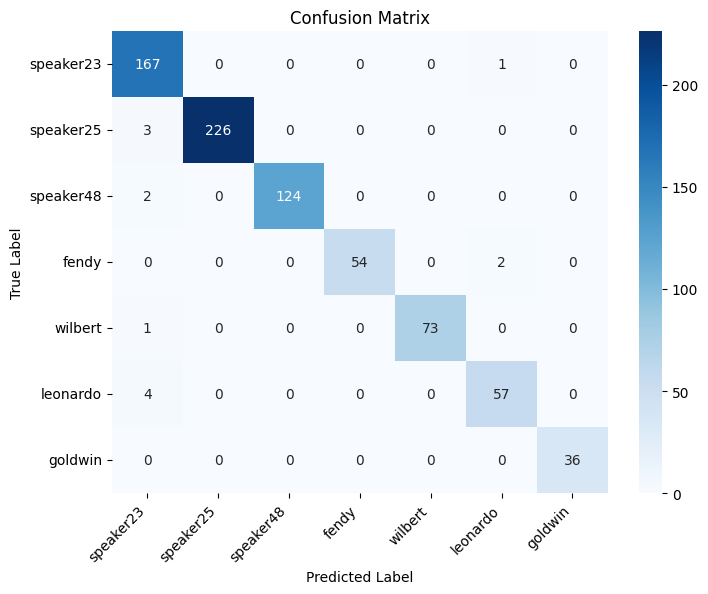

In [ ]:
# confusion matrix untuk model RNN
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=speaker_folders)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()